### Supervised Learning Analysis: Gaussian distribution testing


#### Gaussian distribution testing 
* Here I am interested in the differences in accuracy of predictions given 2 variables.
    * Median/MAD vs mean/sd for gaussian parameter estimation
    * having a minimum of 2 for gaussian SD
   


In [1]:
import os
import numpy as np
import pandas as pd
from py3helpers.aws import AwsS3
from rrna_analysis.plot_experiment_table import plot_acc_heatmap_for_experiment
from rrna_analysis.multiple_model_accuracy import plot_accuracy_vs_delta_and_accuracy_over_time, preprocess_accuracy_csv
from rrna_analysis.kmer_pos_mapping import KmerPosMapping

mods_csv = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/mod_file.csv"
reference = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/yeast_25S_18S.fa"
positions = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/yeast_18S_25S_variants.positions"
kpm = KmerPosMapping(reference, positions, mods_csv)
client = AwsS3()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


Enter MFA code for arn:aws:iam::652235167018:mfa/andbaile@ucsc.edu: ········


In [2]:
model_n = 30
# key="accuracy"
# key="recall"
# key="specificity"
# key="precision"
# key="negative_predictive_value"
key="brier_score"
# key="f1_score"

max_percent=100
min_percent=0
min_delta=0
max_delta=np.inf

gdt1 = "/Volumes/gdrive/rrna_kube_testing/supervised/gaussian_distribution_testing/train_500_test_500_prob_0.5_em_iterations_30_USE_MEDIAN_false_MIN_SD_0/"
gdt2 = "/Volumes/gdrive/rrna_kube_testing/supervised/gaussian_distribution_testing/train_500_test_500_prob_0.5_em_iterations_30_USE_MEDIAN_false_MIN_SD_2/"
gdt3 = "/Volumes/gdrive/rrna_kube_testing/supervised/gaussian_distribution_testing/train_500_test_500_prob_0.5_em_iterations_30_USE_MEDIAN_true_MIN_SD_0/"
gdt4 = "/Volumes/gdrive/rrna_kube_testing/supervised/gaussian_distribution_testing/train_500_test_500_prob_0.5_em_iterations_30_USE_MEDIAN_true_MIN_SD_2/"

top_dirs = [gdt1, gdt2, gdt3, gdt4]
round_n = 30
overwrite=False
# top_dirs = [_30_rounds,
#             _60_rounds]
# round_n = [30, 60]


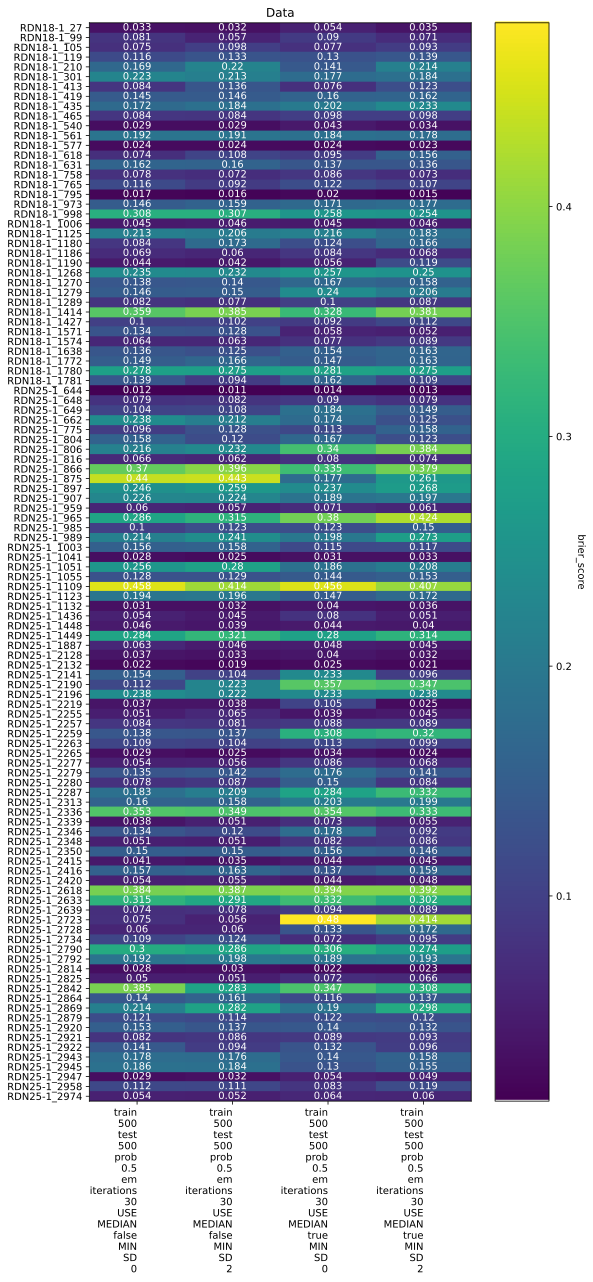

In [3]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
plot_acc_heatmap_for_experiment(top_dirs, key, kpm, max_percent=max_percent, min_percent=min_percent, min_delta=min_delta, max_delta=max_delta, round_n=round_n, show_numbers=True, client=client)

In [1]:
from rrna_analysis.multiple_model_accuracy import plot_accuracy_vs_delta_and_accuracy_over_time, preprocess_accuracy_csv, sort_dir   
from rrna_analysis.kmer_pos_mapping import KmerPosMapping
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os
from py3helpers.utils import list_dir
from signalalign.hiddenMarkovModel import HmmModel


mods_csv = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/mod_file.csv"
reference = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/yeast_25S_18S.fa"
positions = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/yeast_18S_25S_variants.positions"
kpm = KmerPosMapping(reference, positions, mods_csv)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


### Mean vs Median

In [4]:
from py3helpers.utils import list_dir
mean = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/gaussian_distribution_testing/train_500_test_500_prob_0.5_em_iterations_30_USE_MEDIAN_false_MIN_SD_0/testing_accuracy_csvs"
median = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/gaussian_distribution_testing/train_500_test_500_prob_0.5_em_iterations_30_USE_MEDIAN_true_MIN_SD_0/testing_accuracy_csvs"
mean_data = [preprocess_accuracy_csv(x, kpm.subset_mod_data) for x in sort_dir(mean, "csv")]
median_data = [preprocess_accuracy_csv(x, kpm.subset_mod_data) for x in sort_dir(median, "csv")]



<IPython.core.display.Javascript object>


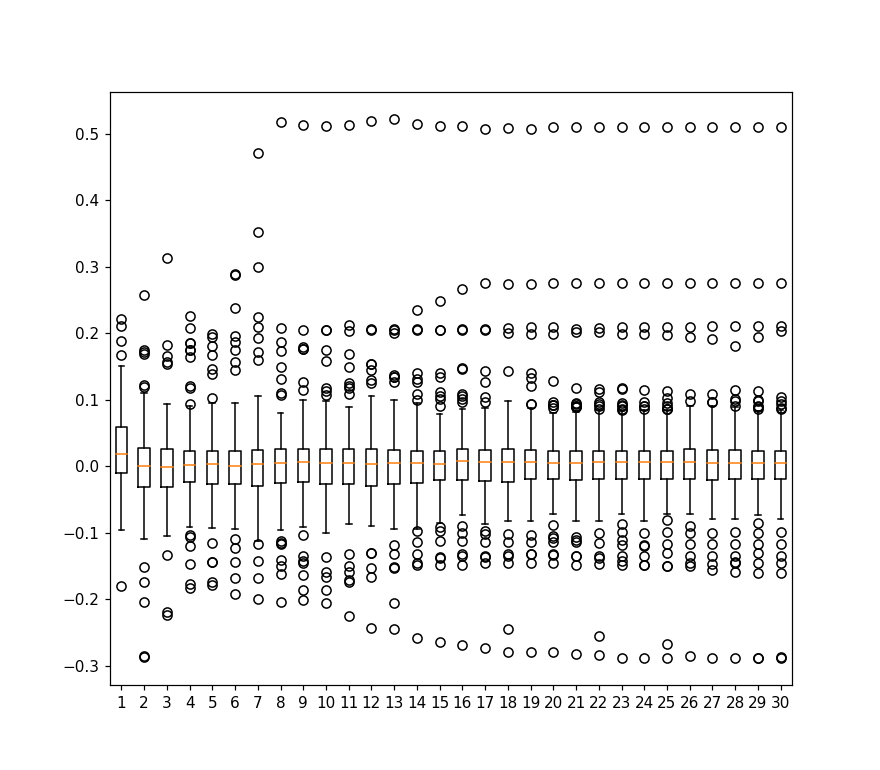

In [5]:
%matplotlib notebook
# mean-median
deltas = [mean_data[i].accuracy - median_data[i].accuracy  for i in range(len(mean_data))]
fig = plt.figure(figsize =(8, 7)) 
  
# Creating plot 
plt.boxplot(deltas) 
  
# show plot 
plt.show() 


In [40]:
i = 29
testing_diff = 0.05
mean_data[i]["testing_diff"] =  mean_data[i].accuracy - median_data[i].accuracy 
final_round_mean = mean_data[i]
print(np.sum(final_round_mean["testing_diff"]))


0.5703000000000004


In [41]:
final_round_mean[np.abs(final_round_mean["testing_diff"]) > 0.05]

,contig,reference_index,strand,variants,accuracy,precision,negative_predictive_value,recall,specificity,positive_likelihood_ratio,negative_likelihood_ratio,diagnostic_odds_ratio,f1_score,prevalence,aucroc,avg_precision,brier_score,delta1,delta2,delta,in_2prime,in_pseudo,in_unknown,percent,testing_diff
5,RDN18-1,301,+,Tl,0.7255,0.6819,0.7984,0.8496,0.6004,2.1262,0.4703,4.5206,0.7566,0.5020,0.8184,0.8132,0.2226,112.0,91.0,91.0,False,False,False,86,-0.0551
14,RDN18-1,631,+,Tl,0.7790,0.7509,0.8150,0.8384,0.7190,2.9839,0.3351,8.9035,0.7923,0.5026,0.8571,0.8381,0.1622,127.0,13.0,13.0,False,False,False,84,-0.0524
19,RDN18-1,998,+,Tl,0.6429,0.5892,0.8902,0.9611,0.3202,1.4137,0.7074,1.9985,0.7305,0.5036,0.8014,0.7449,0.3075,8.0,25.0,8.0,False,False,False,84,-0.0609
27,RDN18-1,1279,+,Ci,0.8120,0.8024,0.8228,0.8337,0.7899,3.9683,0.2520,15.7474,0.8177,0.5057,0.8842,0.8953,0.1465,10.0,9.0,9.0,False,False,False,84,0.0882
31,RDN18-1,1571,+,Gc,0.8205,0.7472,0.9631,0.9753,0.6617,2.8831,0.3468,8.3123,0.8462,0.5063,0.9564,0.9444,0.1335,3.0,144.0,3.0,False,False,False,100,-0.1169
39,RDN25-1,649,+,Cb,0.9228,0.9500,0.8982,0.8937,0.9523,18.7280,0.0534,350.7386,0.9210,0.5036,0.9178,0.9539,0.1045,13.0,1.0,1.0,False,False,False,94,0.2112
40,RDN25-1,662,+,Cb,0.6591,0.6190,0.7459,0.8405,0.4751,1.6013,0.6245,2.5640,0.7129,0.5036,0.8042,0.8455,0.2382,113.0,13.0,13.0,False,False,False,74,-0.1463
43,RDN25-1,806,+,Aa,0.6660,0.6139,0.8178,0.9076,0.4208,1.5671,0.6381,2.4557,0.7324,0.5036,0.8266,0.8258,0.2162,10.0,2.0,2.0,False,False,False,95,0.0848
46,RDN25-1,875,+,Aa,0.5140,0.5810,0.5058,0.1255,0.9081,1.3664,0.7319,1.8670,0.2064,0.5036,0.5361,0.5384,0.4396,22.0,9.0,9.0,False,False,False,75,-0.2891
50,RDN25-1,965,+,Tl,0.6266,0.6158,0.6405,0.6893,0.5628,1.5765,0.6343,2.4853,0.6505,0.5041,0.6779,0.6820,0.2864,20.0,6.0,6.0,False,False,False,91,0.0934


In [35]:
hfhd_final_round = mean_data[i][(mean_data[i]["delta"] > 5) & (mean_data[i]["percent"] >= 90)]  

In [46]:
hfhd_final_round["testing_diff"].describe()

count    38.000000
mean      0.012426
std       0.059472
min      -0.098900
25%      -0.010775
50%       0.007150
75%       0.022325
max       0.275200
Name: testing_diff, dtype: float64

In [36]:
hfhd_final_round[np.abs(hfhd_final_round["testing_diff"]) > 0.05]

,contig,reference_index,strand,variants,accuracy,precision,negative_predictive_value,recall,specificity,positive_likelihood_ratio,negative_likelihood_ratio,diagnostic_odds_ratio,f1_score,prevalence,aucroc,avg_precision,brier_score,delta1,delta2,delta,in_2prime,in_pseudo,in_unknown,percent,testing_diff
50,RDN25-1,965,+,Tl,0.6266,0.6158,0.6405,0.6893,0.5628,1.5765,0.6343,2.4853,0.6505,0.5041,0.6779,0.6820,0.2864,20.0,6.0,6.0,False,False,False,91,0.0934
58,RDN25-1,1123,+,Tl,0.7271,0.6801,0.8123,0.8680,0.5832,2.0824,0.4802,4.3365,0.7627,0.5052,0.8402,0.8546,0.1939,9.0,14.0,9.0,False,False,False,95,-0.0989
66,RDN25-1,2141,+,Af,0.8298,0.9969,0.7427,0.6688,0.9978,305.6247,0.0033,93406.4804,0.8005,0.5107,0.9137,0.9146,0.1535,49.0,9.0,9.0,False,False,False,95,0.0793
67,RDN25-1,2190,+,Tl,0.8662,0.8548,0.8790,0.8889,0.8425,5.6420,0.1772,31.8319,0.8715,0.5107,0.9140,0.9111,0.1124,6.0,49.0,6.0,False,False,False,95,0.2752
69,RDN25-1,2219,+,Aa,0.9550,0.9823,0.9296,0.9287,0.9825,53.0532,0.0188,2814.6417,0.9547,0.5107,0.9839,0.9828,0.0374,36.0,23.0,23.0,False,False,False,93,0.0867
78,RDN25-1,2287,+,Gc,0.7489,0.7647,0.7336,0.7358,0.7626,3.1001,0.3226,9.6106,0.7500,0.5118,0.8246,0.8248,0.1832,26.0,7.0,7.0,False,False,False,95,0.0826
98,RDN25-1,2842,+,Th,0.4876,0.5000,0.4439,0.7595,0.2018,0.9515,1.0510,0.9053,0.6030,0.5124,0.5642,0.5971,0.3852,22.0,17.0,17.0,False,False,False,95,-0.0789
108,RDN25-1,2958,+,Cb,0.8480,0.8371,0.8605,0.8726,0.8222,4.9084,0.2037,24.0928,0.8545,0.5114,0.9169,0.9469,0.1123,16.0,11.0,11.0,False,False,False,94,-0.0554


In [42]:
from py3helpers.utils import list_dir
mean = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/gaussian_distribution_testing/train_500_test_500_prob_0.5_em_iterations_30_USE_MEDIAN_false_MIN_SD_0/testing_accuracy_csvs"
median = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/gaussian_distribution_testing/train_500_test_500_prob_0.5_em_iterations_30_USE_MEDIAN_true_MIN_SD_0/testing_accuracy_csvs"
mean2 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/gaussian_distribution_testing/train_500_test_500_prob_0.5_em_iterations_30_USE_MEDIAN_false_MIN_SD_2/testing_accuracy_csvs"
median2 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/gaussian_distribution_testing/train_500_test_500_prob_0.5_em_iterations_30_USE_MEDIAN_true_MIN_SD_2/testing_accuracy_csvs"

mean_data = [preprocess_accuracy_csv(x, kpm.subset_mod_data) for x in sort_dir(mean, "csv")]
median_data = [preprocess_accuracy_csv(x, kpm.subset_mod_data) for x in sort_dir(median, "csv")]
mean2_data = [preprocess_accuracy_csv(x, kpm.subset_mod_data) for x in sort_dir(mean2, "csv")]
median2_data = [preprocess_accuracy_csv(x, kpm.subset_mod_data) for x in sort_dir(median2, "csv")]


In [58]:
i = 29
mean_data[i]["mean-median"] =  mean_data[i].accuracy - median_data[i].accuracy 
mean_data[i]["mean-mean2"] =  mean_data[i].accuracy - mean2_data[i].accuracy 
mean_data[i]["median-median2"] =  median_data[i].accuracy - median2_data[i].accuracy 
mean_data[i]["mean2-median2"] =  mean2_data[i].accuracy - median2_data[i].accuracy 
mean_data[i]["mean2-median"] =  mean2_data[i].accuracy - median_data[i].accuracy 

final_round_data = mean_data[i]
final_round_data[["mean-median", "mean-mean2", "median-median2", "mean2-median2", "mean2-median"]].describe()

,mean-median,mean-mean2,median-median2,mean2-median2,mean2-median
count,110.000000,110.000000,110.000000,110.000000,110.000000
mean,0.005185,0.007702,0.009841,0.007324,-0.002517
std,0.086778,0.035194,0.048128,0.071793,0.088770
min,-0.289100,-0.102100,-0.128500,-0.192800,-0.294300
25%,-0.019125,-0.004900,-0.010700,-0.013525,-0.033625
50%,0.005250,0.001100,-0.001000,0.002100,0.004150
75%,0.022700,0.015825,0.032625,0.014975,0.023675
max,0.510200,0.150300,0.165400,0.483300,0.525300


In [50]:
final_round_data

,contig,reference_index,strand,variants,accuracy,precision,negative_predictive_value,recall,specificity,positive_likelihood_ratio,negative_likelihood_ratio,diagnostic_odds_ratio,f1_score,prevalence,aucroc,avg_precision,brier_score,delta1,delta2,delta,in_2prime,in_pseudo,in_unknown,percent,mean-median,mean-mean2,median-median2,mean2-median2
0,RDN18-1,27,+,Aa,0.9592,0.9892,0.9326,0.9289,0.9898,90.8427,0.0110,8252.3930,0.9581,0.5015,0.9864,0.9845,0.0333,72.0,NaN,72.0,False,False,False,95,0.0224,0.0000,-0.0204,0.0020
1,RDN18-1,99,+,Aa,0.9123,0.9927,0.8541,0.8313,0.9939,135.5020,0.0074,18360.8008,0.9049,0.5015,0.9428,0.9442,0.0812,6.0,72.0,6.0,False,False,False,80,0.0081,-0.0204,-0.0143,0.0142
2,RDN18-1,105,+,Tl,0.9042,0.8996,0.9089,0.9106,0.8978,8.9054,0.1123,79.3055,0.9051,0.5015,0.9608,0.9553,0.0751,14.0,6.0,6.0,False,False,False,95,-0.0041,0.0275,0.0214,-0.0102
3,RDN18-1,119,+,Tl,0.8420,0.8297,0.8553,0.8618,0.8221,4.8438,0.2064,23.4628,0.8455,0.5015,0.9285,0.9342,0.1160,91.0,14.0,14.0,False,False,False,95,0.0071,0.0316,0.0347,0.0102
4,RDN18-1,210,+,Tl,0.7890,0.7654,0.8176,0.8354,0.7423,3.2420,0.3085,10.5107,0.7988,0.5015,0.8770,0.8860,0.1687,91.0,91.0,91.0,False,False,False,83,-0.0479,0.0724,0.1152,-0.0051
5,RDN18-1,301,+,Tl,0.7255,0.6819,0.7984,0.8496,0.6004,2.1262,0.4703,4.5206,0.7566,0.5020,0.8184,0.8132,0.2226,112.0,91.0,91.0,False,False,False,86,-0.0551,0.0051,0.0092,-0.0510
6,RDN18-1,413,+,Cb,0.8946,0.8787,0.9120,0.9163,0.8727,7.1976,0.1389,51.8054,0.8971,0.5015,0.9483,0.9583,0.0839,6.0,112.0,6.0,False,False,False,95,-0.0194,0.0932,0.0849,-0.0277
7,RDN18-1,419,+,Aa,0.8137,0.8649,0.7748,0.7449,0.8830,6.3643,0.1571,40.5044,0.8004,0.5015,0.8644,0.8839,0.1453,16.0,6.0,6.0,False,False,False,95,0.0112,0.0031,0.0011,0.0092
8,RDN18-1,435,+,Aa,0.7881,0.7331,0.8784,0.9082,0.6674,2.7301,0.3663,7.4534,0.8113,0.5015,0.8950,0.8801,0.1722,30.0,16.0,16.0,False,False,False,73,0.0348,0.0184,0.0327,0.0491
9,RDN18-1,465,+,Tl,0.8864,0.9702,0.8275,0.7980,0.9754,32.3838,0.0309,1048.7133,0.8757,0.5015,0.9607,0.9629,0.0844,75.0,30.0,30.0,False,False,False,60,0.0123,-0.0010,0.0000,0.0133


In [70]:
final_round_data[["contig", "reference_index", "strand", "recall", "percent"]]

,contig,reference_index,strand,recall,percent
0,RDN18-1,27,+,0.9289,95
1,RDN18-1,99,+,0.8313,80
2,RDN18-1,105,+,0.9106,95
3,RDN18-1,119,+,0.8618,95
4,RDN18-1,210,+,0.8354,83
5,RDN18-1,301,+,0.8496,86
6,RDN18-1,413,+,0.9163,95
7,RDN18-1,419,+,0.7449,95
8,RDN18-1,435,+,0.9082,73
9,RDN18-1,465,+,0.7980,60


<IPython.core.display.Javascript object>


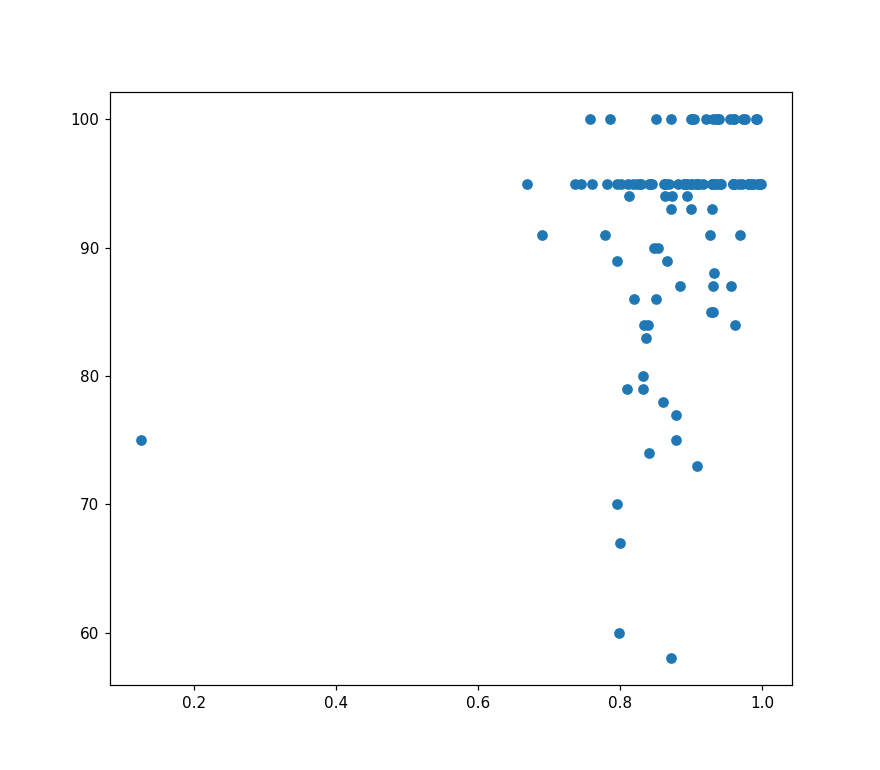

In [69]:
%matplotlib notebook
# mean-median
fig = plt.figure(figsize =(8, 7)) 
  
# Creating plot 
plt.scatter(final_round_data["recall"], final_round_data["percent"]) 
  
# show plot 
plt.show() 


In [48]:
hfhd_data = final_round_data[(final_round_data["delta"] > 5) & (final_round_data["percent"] >= 90)]

In [49]:
hfhd_data[["mean-median", "mean-mean2", "median-median2", "mean2-median2"]].describe()

,mean-median,mean-mean2,median-median2,mean2-median2
count,38.000000,38.000000,38.000000,38.000000
mean,0.012426,0.013237,0.012511,0.011700
std,0.059472,0.041766,0.046259,0.035756
min,-0.098900,-0.076700,-0.128500,-0.046900
25%,-0.010775,-0.006825,-0.006425,-0.002100
50%,0.007150,0.000550,0.001100,0.003750
75%,0.022325,0.023550,0.034125,0.013700
max,0.275200,0.136000,0.101900,0.140300


In [51]:
hfhd_data

,contig,reference_index,strand,variants,accuracy,precision,negative_predictive_value,recall,specificity,positive_likelihood_ratio,negative_likelihood_ratio,diagnostic_odds_ratio,f1_score,prevalence,aucroc,avg_precision,brier_score,delta1,delta2,delta,in_2prime,in_pseudo,in_unknown,percent,mean-median,mean-mean2,median-median2,mean2-median2
0,RDN18-1,27,+,Aa,0.9592,0.9892,0.9326,0.9289,0.9898,90.8427,0.0110,8252.3930,0.9581,0.5015,0.9864,0.9845,0.0333,72.0,NaN,72.0,False,False,False,95,0.0224,0.0000,-0.0204,0.0020
2,RDN18-1,105,+,Tl,0.9042,0.8996,0.9089,0.9106,0.8978,8.9054,0.1123,79.3055,0.9051,0.5015,0.9608,0.9553,0.0751,14.0,6.0,6.0,False,False,False,95,-0.0041,0.0275,0.0214,-0.0102
3,RDN18-1,119,+,Tl,0.8420,0.8297,0.8553,0.8618,0.8221,4.8438,0.2064,23.4628,0.8455,0.5015,0.9285,0.9342,0.1160,91.0,14.0,14.0,False,False,False,95,0.0071,0.0316,0.0347,0.0102
6,RDN18-1,413,+,Cb,0.8946,0.8787,0.9120,0.9163,0.8727,7.1976,0.1389,51.8054,0.8971,0.5015,0.9483,0.9583,0.0839,6.0,112.0,6.0,False,False,False,95,-0.0194,0.0932,0.0849,-0.0277
7,RDN18-1,419,+,Aa,0.8137,0.8649,0.7748,0.7449,0.8830,6.3643,0.1571,40.5044,0.8004,0.5015,0.8644,0.8839,0.1453,16.0,6.0,6.0,False,False,False,95,0.0112,0.0031,0.0011,0.0092
10,RDN18-1,540,+,Aa,0.9621,0.9871,0.9393,0.9366,0.9877,75.8650,0.0132,5755.5029,0.9612,0.5015,0.9858,0.9858,0.0290,21.0,75.0,21.0,False,False,False,95,0.0124,-0.0010,-0.0103,0.0031
12,RDN18-1,577,+,Td,0.9713,0.9832,0.9598,0.9591,0.9835,58.1454,0.0172,3380.8933,0.9710,0.5021,0.9946,0.9936,0.0240,41.0,16.0,16.0,False,False,False,95,0.0021,0.0021,-0.0010,-0.0010
13,RDN18-1,618,+,Aa,0.9106,0.8957,0.9269,0.9305,0.8905,8.4971,0.1177,72.2011,0.9127,0.5026,0.9567,0.9429,0.0737,13.0,41.0,13.0,False,False,False,100,0.0226,0.0576,0.0843,0.0493
15,RDN18-1,758,+,Tl,0.9062,0.9877,0.8472,0.8238,0.9896,79.4115,0.0126,6306.1824,0.8983,0.5031,0.9644,0.9647,0.0784,7.0,127.0,7.0,False,False,False,95,0.0072,-0.0103,-0.0196,-0.0021
16,RDN18-1,765,+,Tl,0.8423,0.8304,0.8553,0.8627,0.8216,4.8352,0.2068,23.3788,0.8462,0.5031,0.9249,0.9280,0.1164,30.0,7.0,7.0,False,False,False,95,-0.0041,-0.0309,-0.0155,0.0113


In [57]:
t = 0.05
np.abs(hfhd_data["mean-median"]) > t, "mean-mean2", "median-median2", "mean2-median2"]] > 0.05)

,mean-median,mean-mean2,median-median2,mean2-median2
0,False,False,False,False
2,False,False,False,False
3,False,False,False,False
6,False,True,True,False
7,False,False,False,False
10,False,False,False,False
12,False,False,False,False
13,False,True,True,False
15,False,False,False,False
16,False,False,False,False


<IPython.core.display.Javascript object>


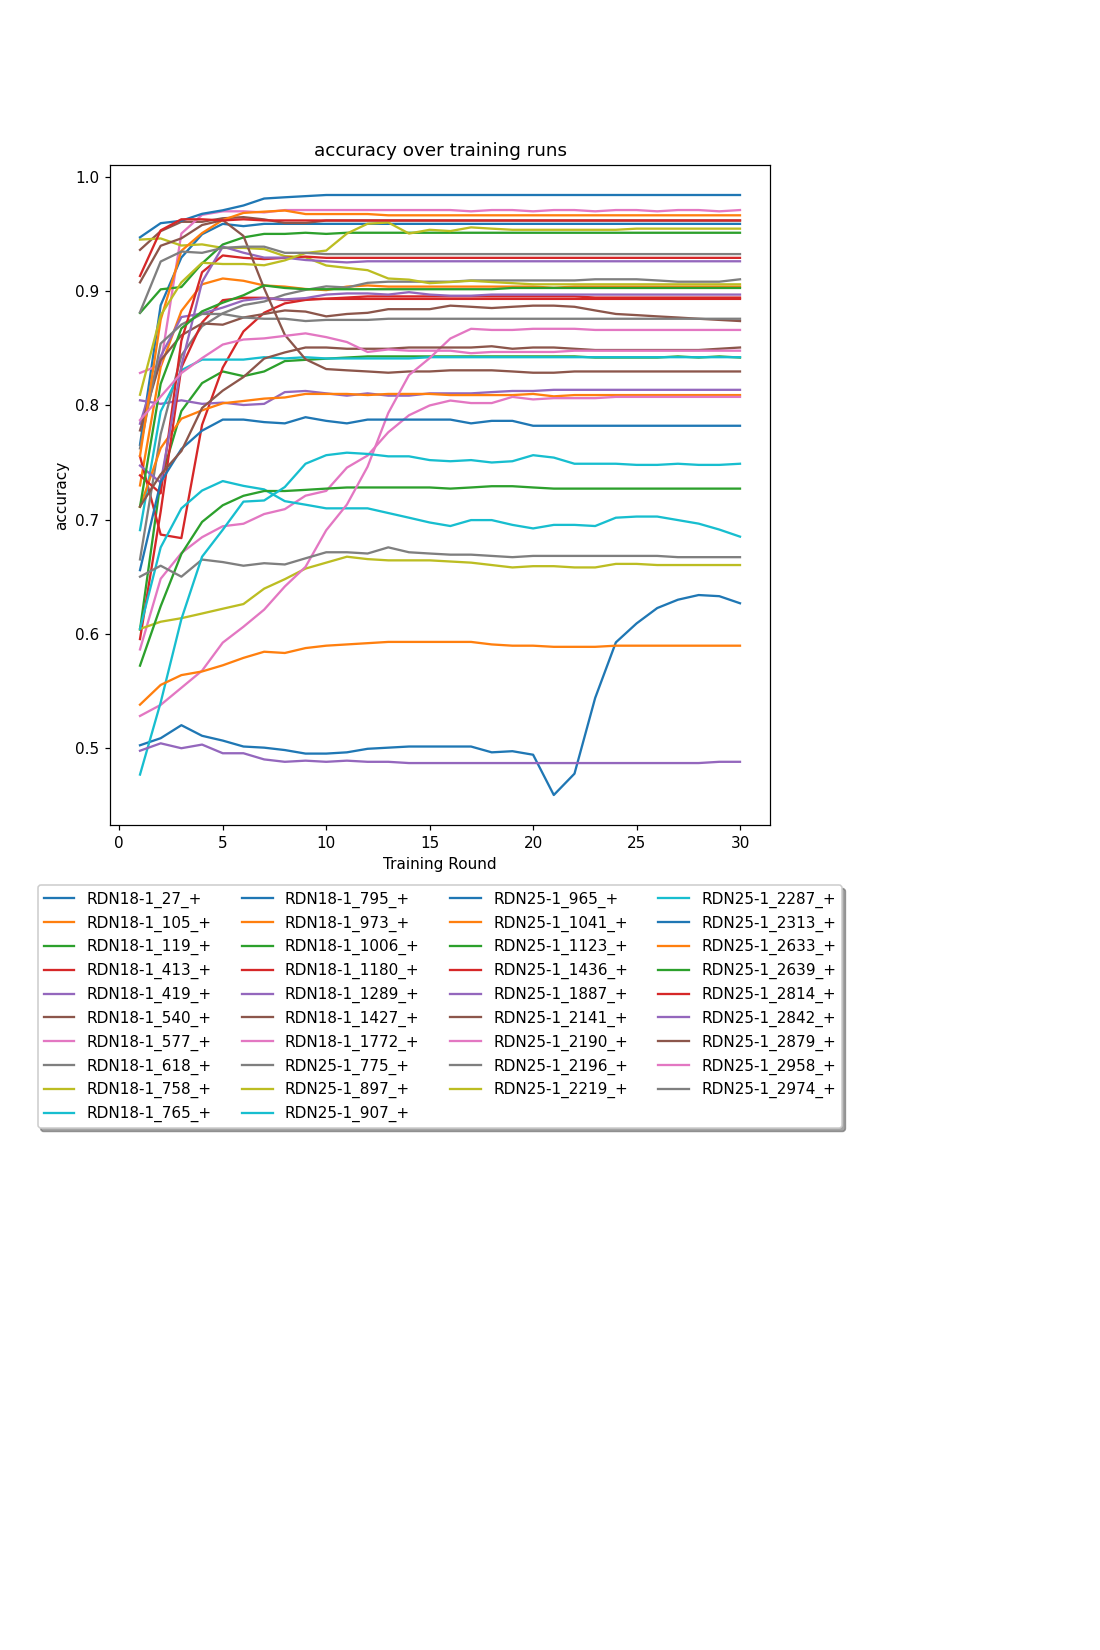

<IPython.core.display.Javascript object>


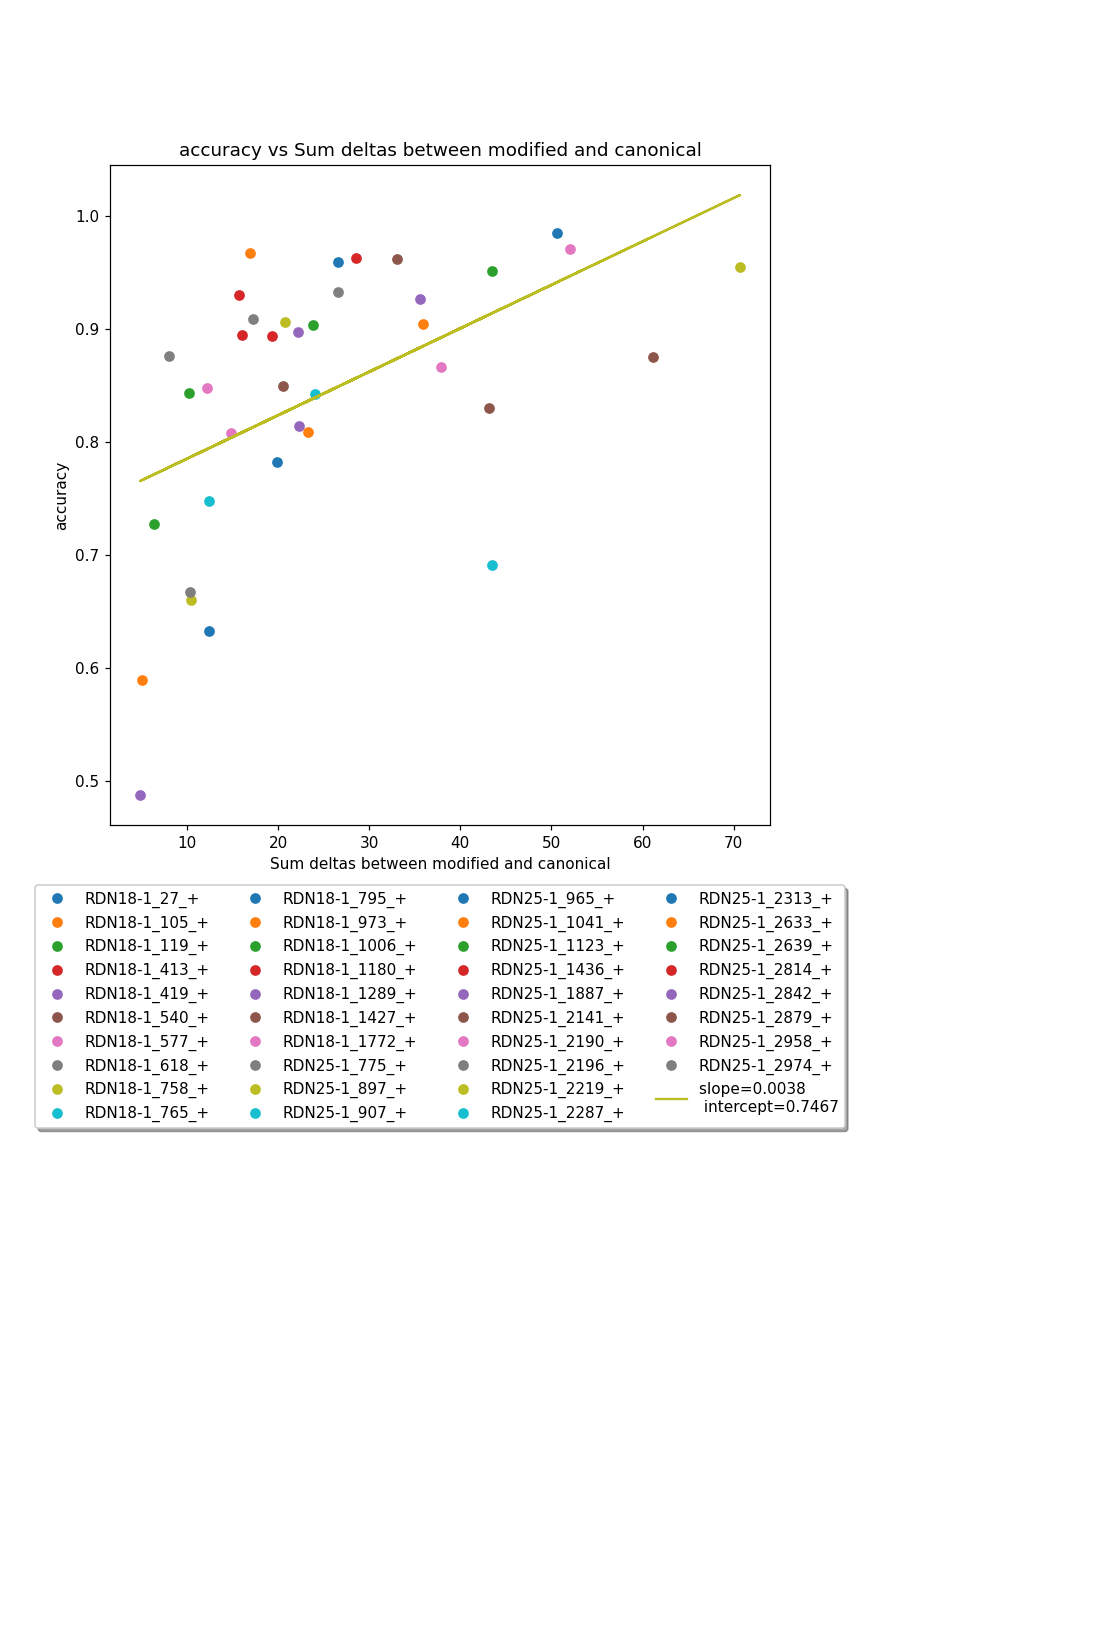

In [59]:
%matplotlib notebook
key="accuracy"

dir_path = "/Volumes/gdrive/rrna_kube_testing/supervised/gaussian_distribution_testing/train_500_test_500_prob_0.5_em_iterations_30_USE_MEDIAN_false_MIN_SD_0/testing_accuracy_csvs"
model_dir = "/Volumes/gdrive/rrna_kube_testing/supervised/gaussian_distribution_testing/train_500_test_500_prob_0.5_em_iterations_30_USE_MEDIAN_false_MIN_SD_0/training_models"
model_n = 30
p, k = plot_accuracy_vs_delta_and_accuracy_over_time(kpm, dir_path, model_dir, model_n, high_percent=100, low_percent=90, low_delta=6, high_delta=np.inf, key=key, max_delta=False)  


<IPython.core.display.Javascript object>


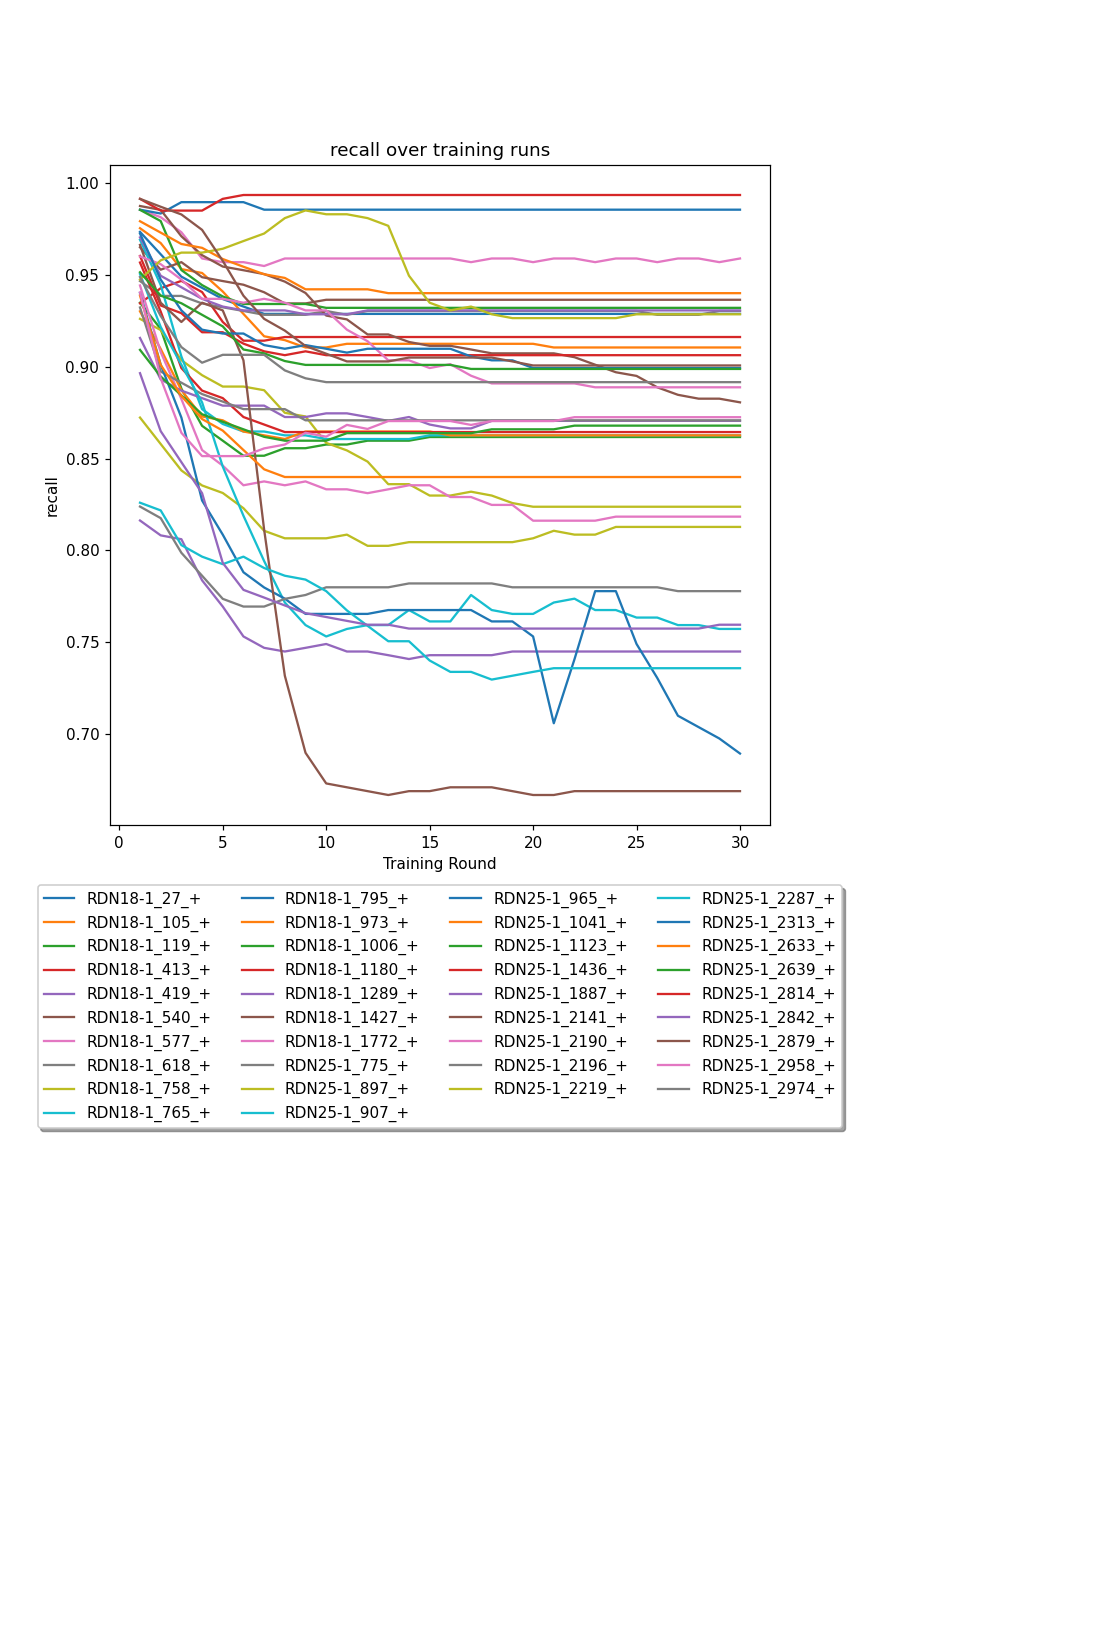

<IPython.core.display.Javascript object>


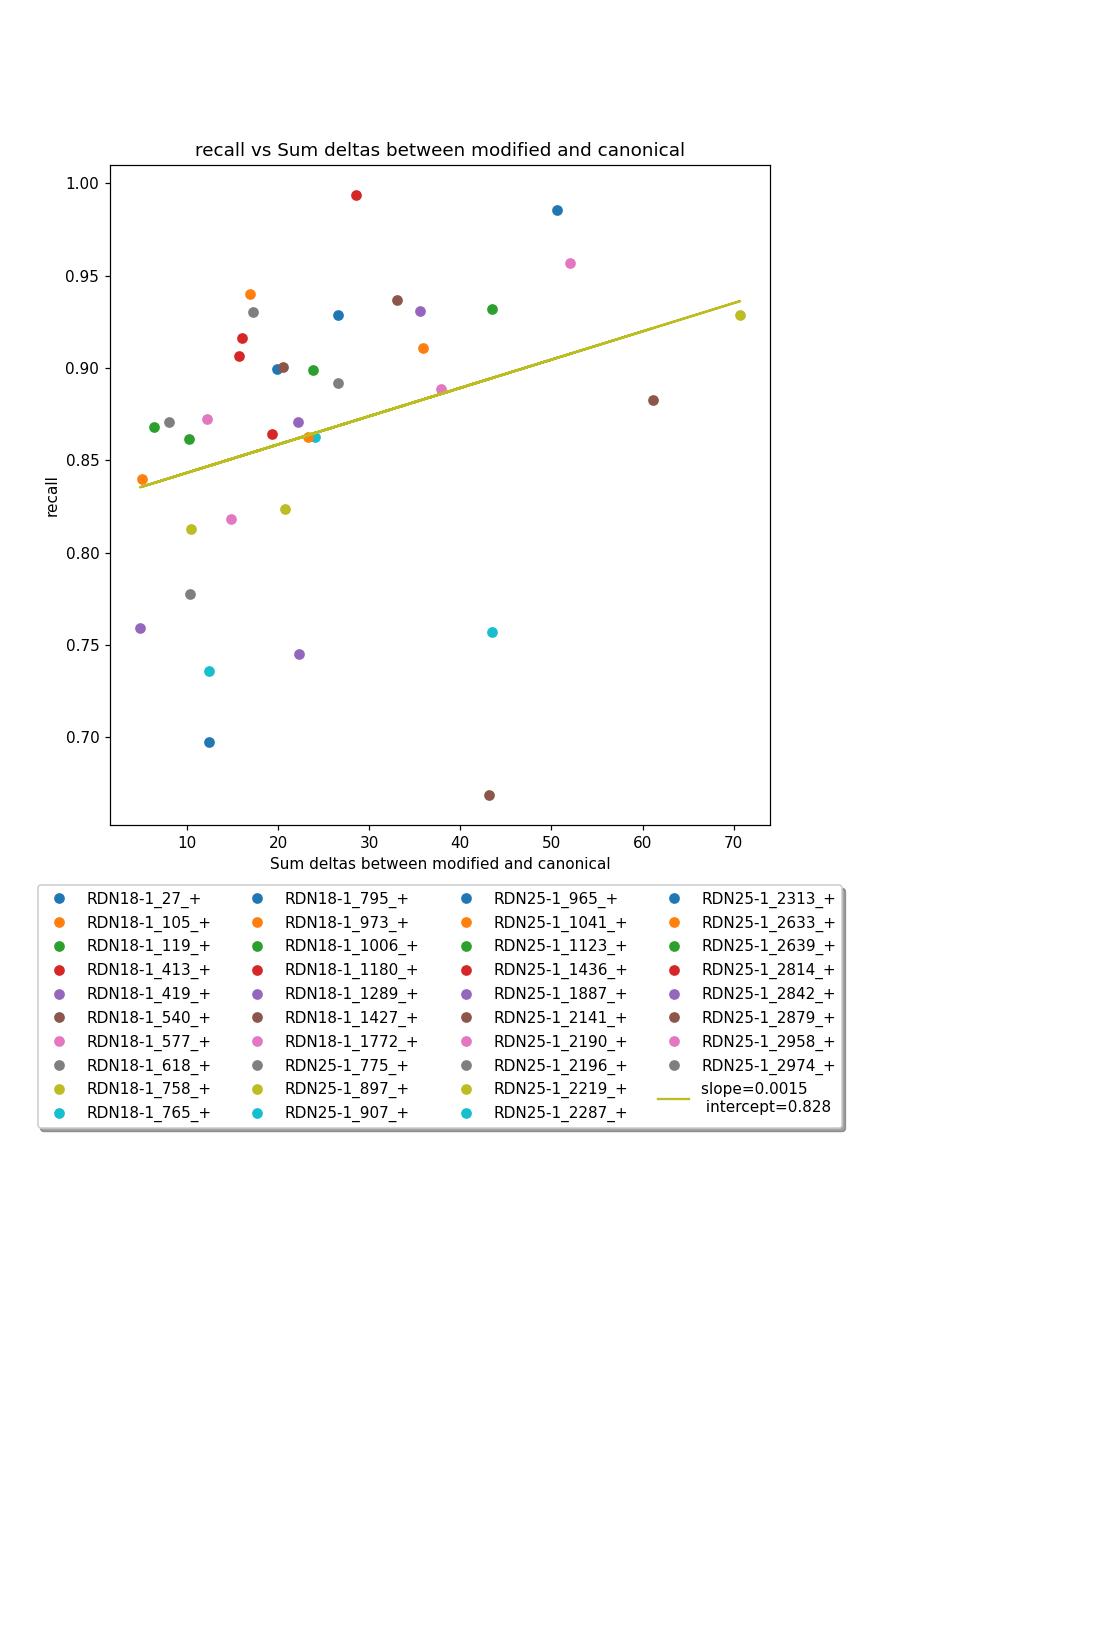

In [60]:
key="recall"
p, k = plot_accuracy_vs_delta_and_accuracy_over_time(kpm, dir_path, model_dir, model_n, high_percent=100, low_percent=90, low_delta=6, high_delta=np.inf, key=key, max_delta=False)  


<IPython.core.display.Javascript object>


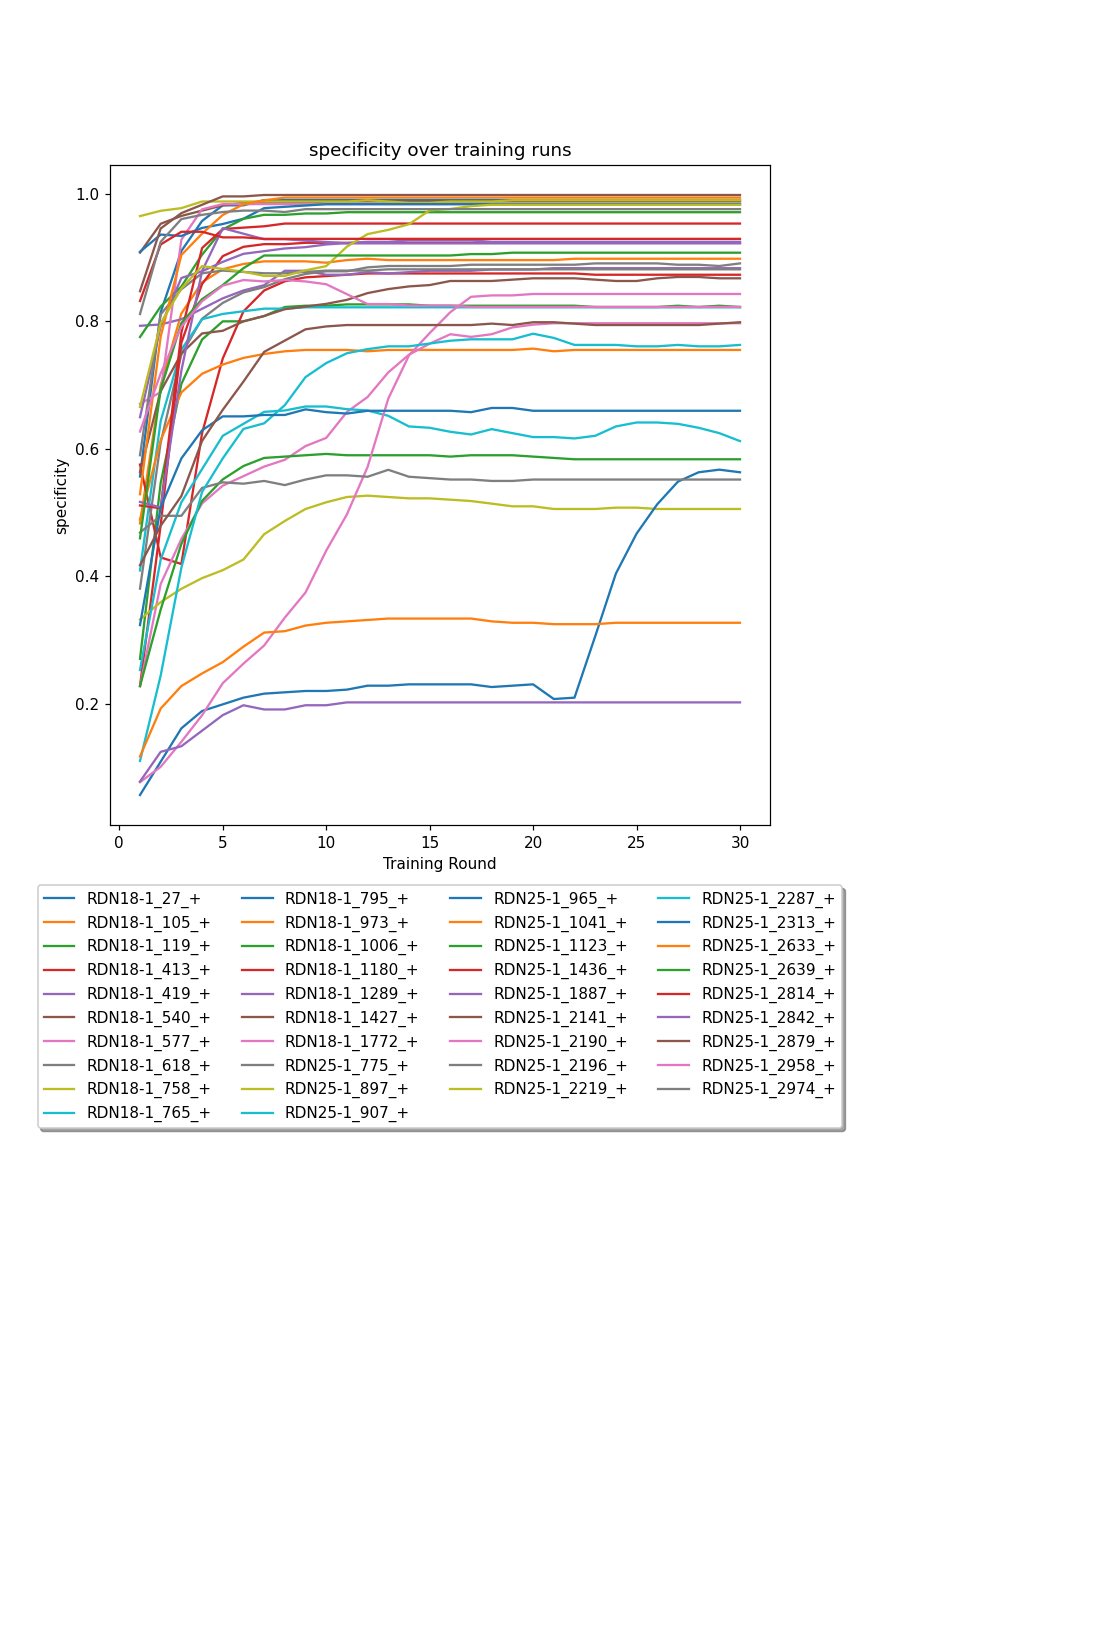

<IPython.core.display.Javascript object>


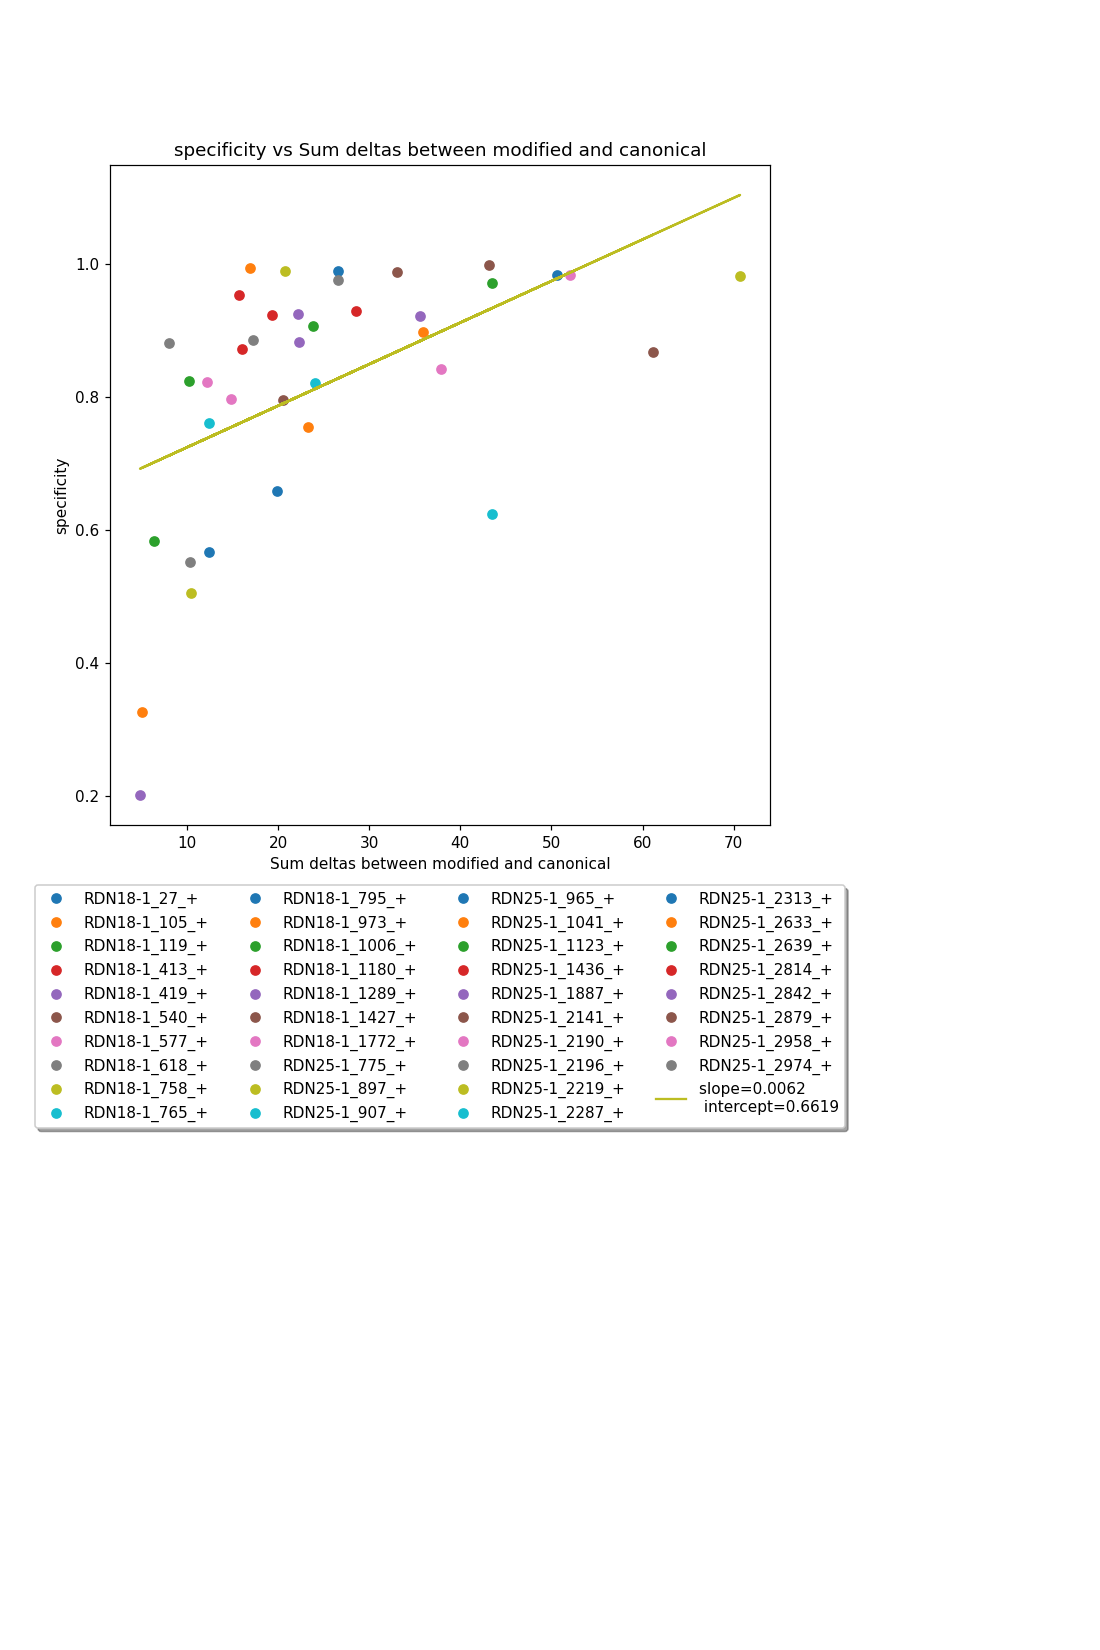

In [61]:
key="specificity"
p, k = plot_accuracy_vs_delta_and_accuracy_over_time(kpm, dir_path, model_dir, model_n, high_percent=100, low_percent=90, low_delta=6, high_delta=np.inf, key=key, max_delta=False)  


<IPython.core.display.Javascript object>


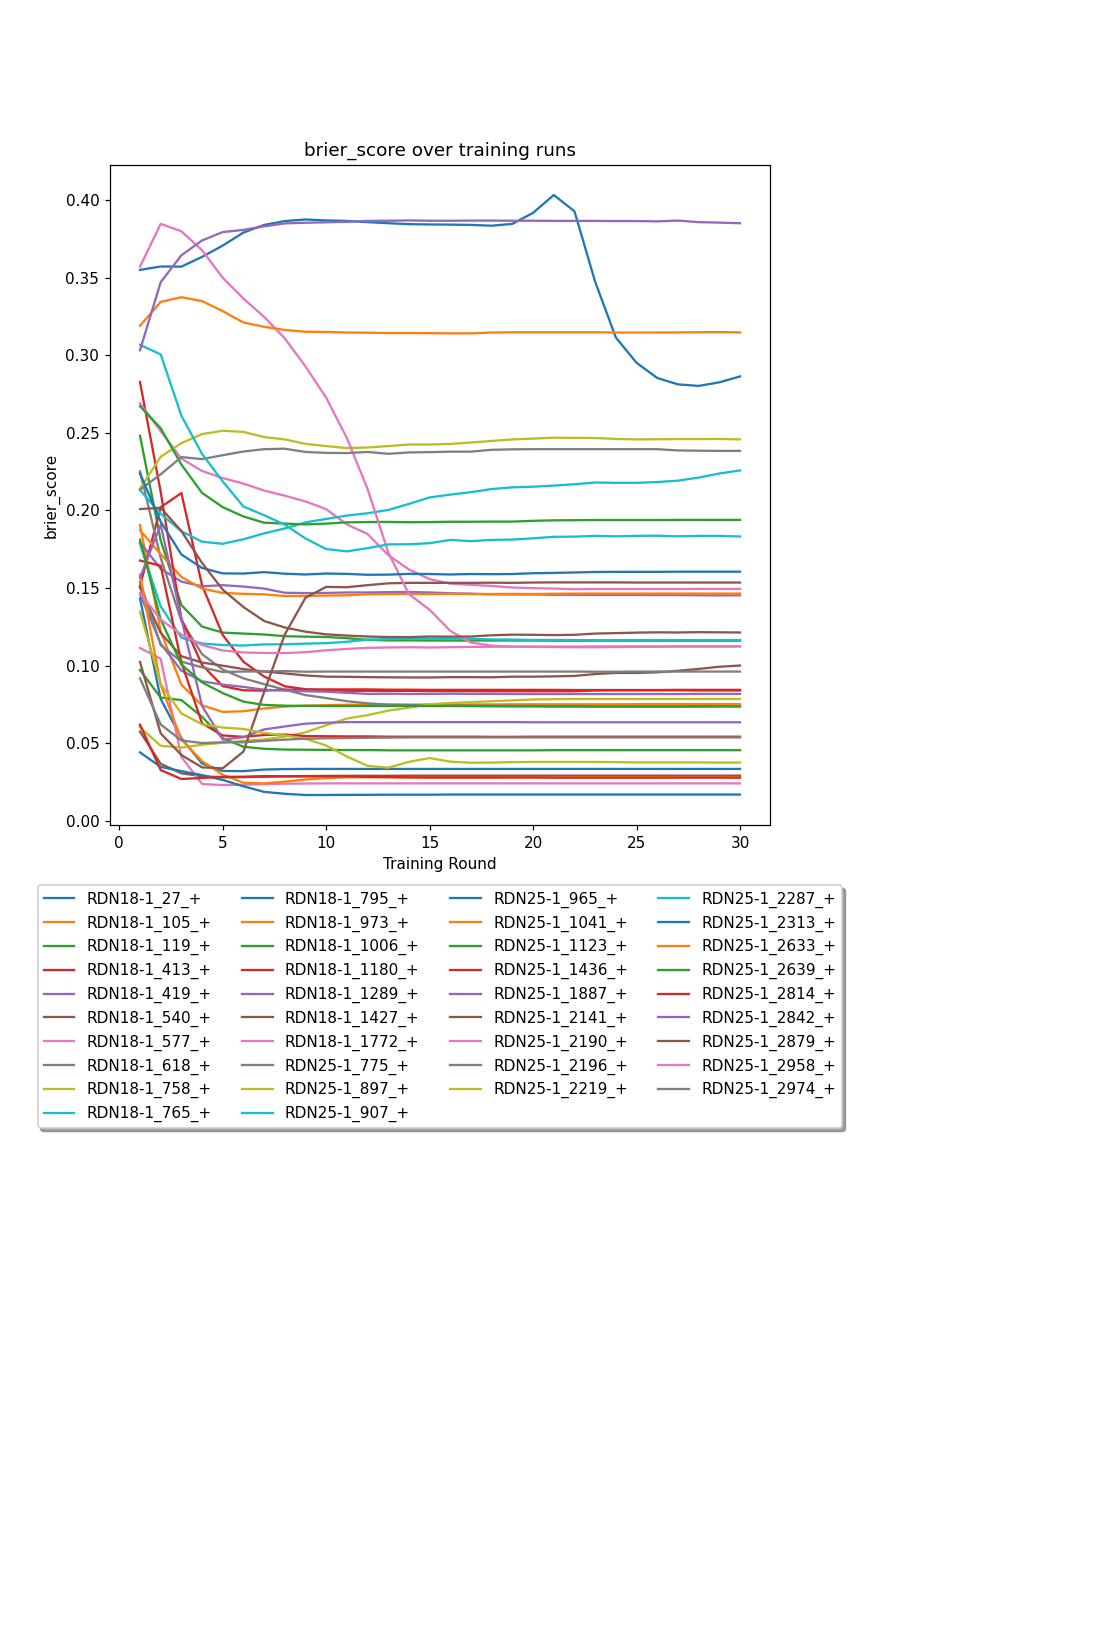

<IPython.core.display.Javascript object>


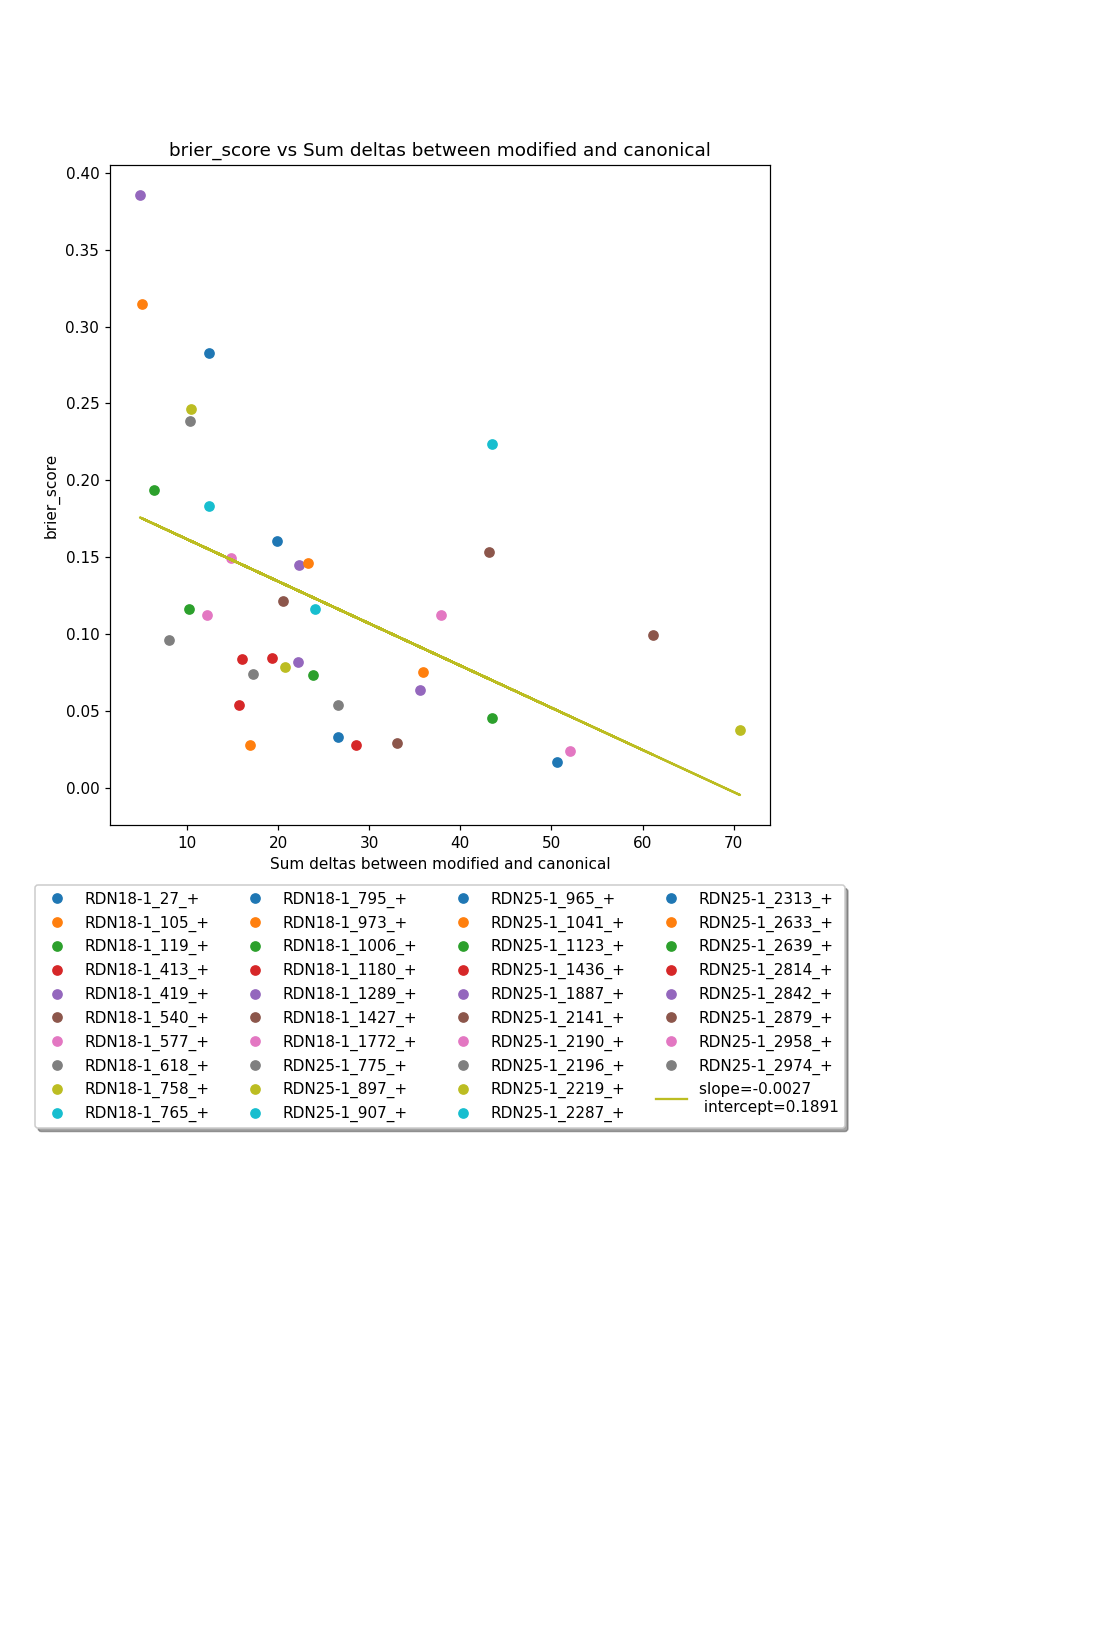

In [62]:
key="brier_score"
p, k = plot_accuracy_vs_delta_and_accuracy_over_time(kpm, dir_path, model_dir, model_n, high_percent=100, low_percent=90, low_delta=6, high_delta=np.inf, key=key, max_delta=False)  


* Given the above plots there are 10 modified positions that we need to look at as not following the overall trend

* Recall Problems
    * 25-2141
    * 25-965
    * 25-2287

* Specificity Problems
    * Primary Problems
        * 25-2190
        * 25-2633
        * 25-965
        * 25-2842
    * Secondary Problems
        * 25-2287
        * 25-897
        * 25-2196
        * 25-907
        * 25-2313
